In [110]:
# library imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data exploration 
# end-goal: based on water level quality, and compliance in 2019, 2020
# predict the compliance in 2021 per measurement station
# not compliant - 1, compliant - 0
train_df = pd.read_csv("data/train.csv")
train_df.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0


In [41]:
train_df.columns

Index(['station_id', 'Aluminium_2019', 'Aluminium_2020', 'Ammonium_2019',
       'Ammonium_2020', 'Boron_2019', 'Boron_2020', 'Chloride_2019',
       'Chloride_2020', 'Coli-like-bacteria-Colilert_2019',
       'Coli-like-bacteria-Colilert_2020', 'Coli-like-bacteria_2019',
       'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt-Co-unit_2019',
       'Color-Pt-Co-unit_2020', 'Color-Pt/Co-scale_2019',
       'Color-Pt/Co-scale_2020', 'Electrical-conductivity_2019',
       'Electrical-conductivity_2020', 'Enterococci_2019', 'Enterococci_2020',
       'Escherichia-coli-Colilert_2019', 'Escherichia-coli-Colilert_2020',
       'Escherichia-coli_2019', 'Escherichia-coli_2020', 'Fluoride_2019',
       'Fluoride_2020', 'Iron_2019', 'Iron_2020', 'Manganese_2019',
       'Manganese_2020', 'Nitrate_2019', 'Nitrate_2020', 'Nitrite_2019',
       'Nitrite_2020', 'Odour-dilution-level_2019',
       'Odour-dilution-level_2020', 'Oxidability_2019', 'Ox

In [40]:
train_df.describe()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
count,440.000000,103.000000,94.000000,307.000000,290.000000,116.000000,108.000000,111.000000,114.000000,125.000000,...,103.000000,305.000000,306.000000,419.000000,426.000000,432.000000,438.000000,440.000000,440.000000,440.000000
mean,847.884091,16.932117,10.102528,0.139752,0.132352,0.321819,0.497083,68.046847,66.514912,20.708800,...,0.524272,1.596721,1.650327,1.404081,1.395329,7.586852,7.652922,0.197727,0.200000,0.150000
std,482.227347,73.882649,12.298492,0.294113,0.236251,0.423732,0.939406,95.549023,84.631374,216.467309,...,0.639311,1.540460,1.429874,3.183978,2.982040,0.303888,0.315106,0.398739,0.400455,0.357478
min,165.000000,0.002000,0.002000,0.027000,0.020000,0.002000,0.009000,1.000000,0.700000,0.000000,...,0.000000,1.000000,1.000000,0.180000,0.140000,6.500000,6.600000,0.000000,0.000000,0.000000
25%,460.500000,5.000000,5.000000,0.050000,0.050000,0.100000,0.100000,4.900000,10.125000,0.000000,...,0.000000,1.000000,1.000000,0.960000,0.850000,7.400000,7.400000,0.000000,0.000000,0.000000
50%,741.000000,10.000000,5.000000,0.050000,0.050000,0.178500,0.252500,21.500000,31.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,7.600000,7.600000,0.000000,0.000000,0.000000
75%,1174.000000,10.000000,10.000000,0.140000,0.140000,0.403500,0.598500,99.500000,98.475000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,7.800000,7.900000,0.000000,0.000000,0.000000
max,2311.000000,754.000000,76.900000,3.500000,3.300000,3.700000,7.700000,461.000000,468.000000,2419.600000,...,3.000000,16.000000,16.000000,50.000000,44.000000,8.640000,8.470000,1.000000,1.000000,1.000000


In [43]:
# sanity drop 
train_df = train_df.drop_duplicates()

In [8]:
# every row contains at least one nan 
len(train_df.isna()) / len(train_df)

1.0

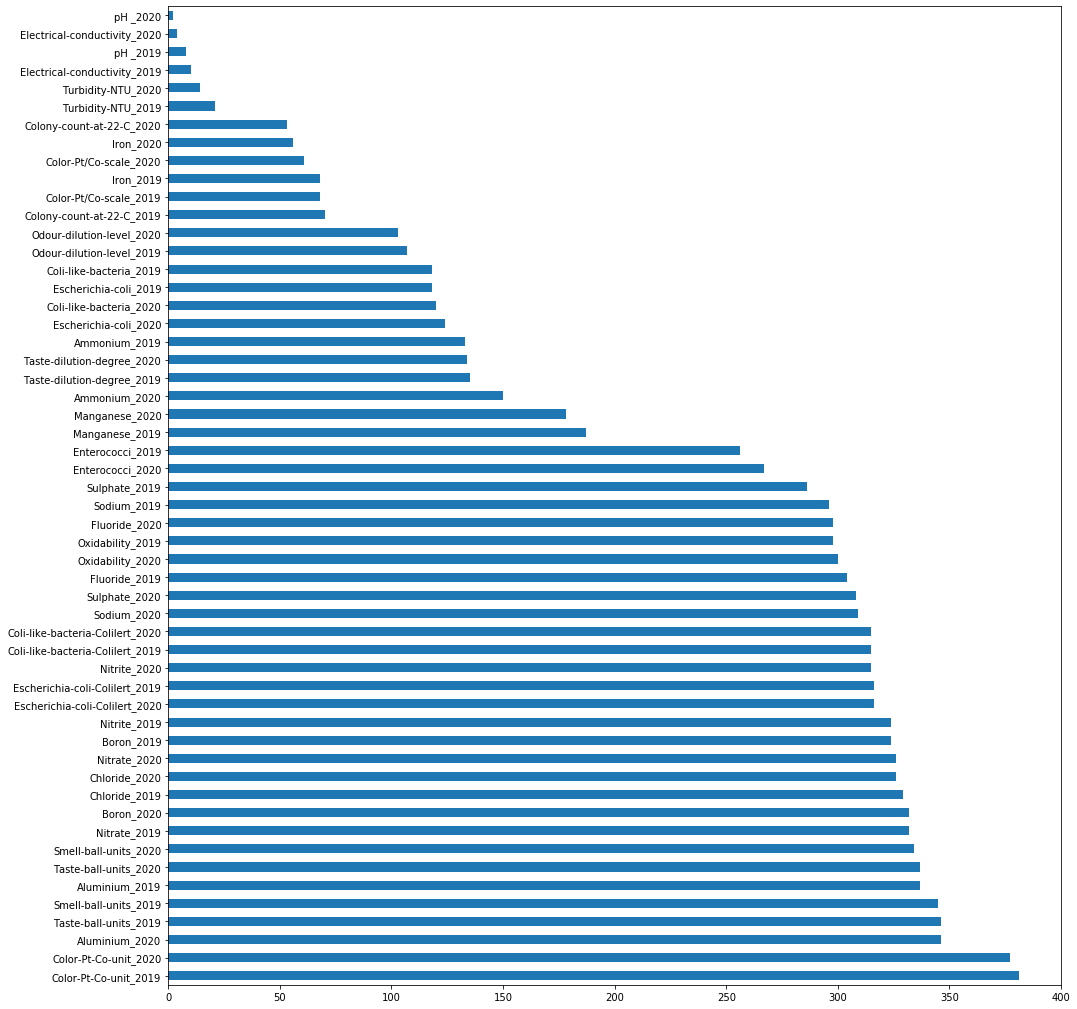

In [56]:
# amount of rows affected per column
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
train_df.isna().sum()[train_df.isna().sum()>0].sort_values(ascending = False).plot(kind='barh')

In [81]:
# dropping columns that had more than 50% of rows with NaN 
perc = 50.0
modified_df = train_df.dropna(axis=1, thresh=int(((100-perc)/100)* len(train_df) + 1))
modified_df.columns

Index(['station_id', 'Ammonium_2019', 'Ammonium_2020',
       'Coli-like-bacteria_2019', 'Coli-like-bacteria_2020',
       'Colony-count-at-22-C_2019', 'Colony-count-at-22-C_2020',
       'Color-Pt/Co-scale_2019', 'Color-Pt/Co-scale_2020',
       'Electrical-conductivity_2019', 'Electrical-conductivity_2020',
       'Escherichia-coli_2019', 'Escherichia-coli_2020', 'Iron_2019',
       'Iron_2020', 'Manganese_2019', 'Manganese_2020',
       'Odour-dilution-level_2019', 'Odour-dilution-level_2020',
       'Taste-dilution-degree_2019', 'Taste-dilution-degree_2020',
       'Turbidity-NTU_2019', 'Turbidity-NTU_2020', 'pH _2019', 'pH _2020',
       'compliance_2019', 'compliance_2020', 'compliance_2021'],
      dtype='object')

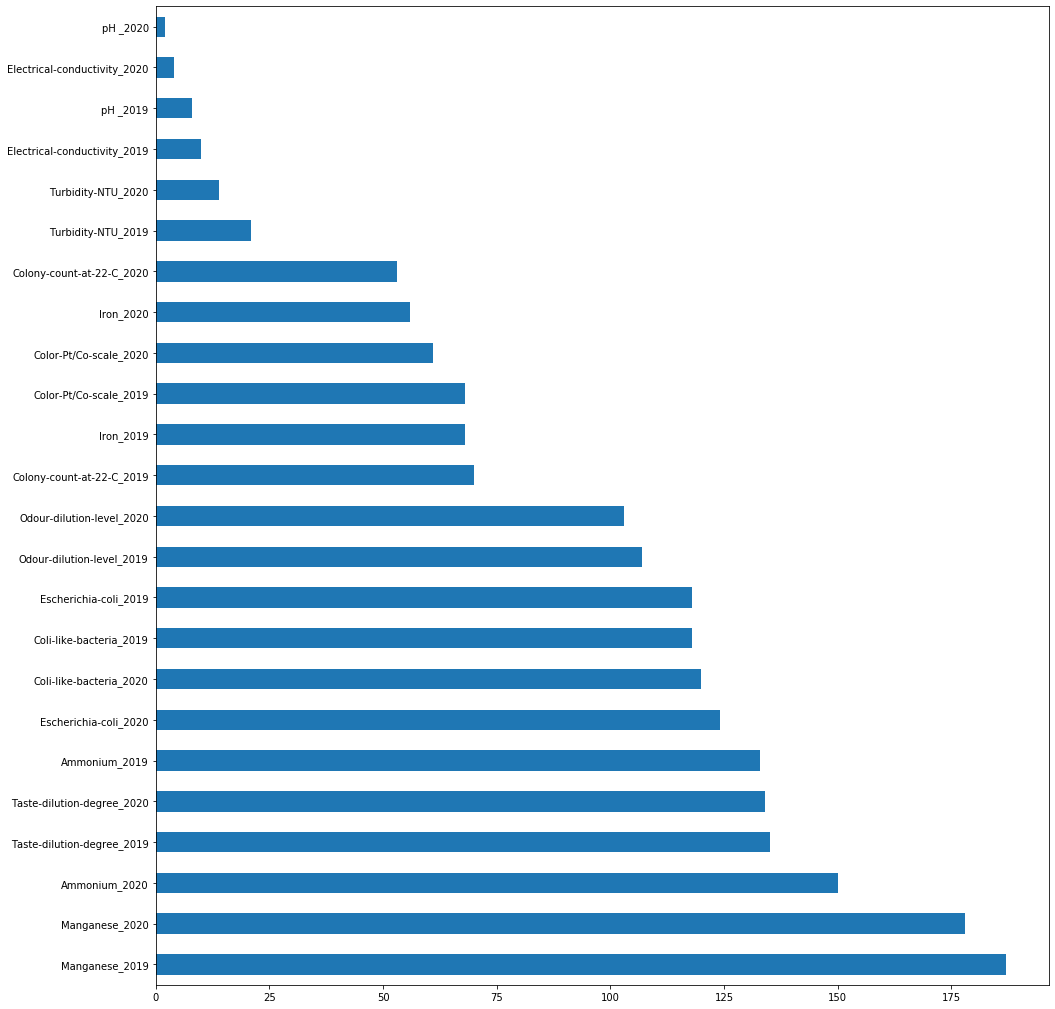

In [120]:
# amount of rows affected per column
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
modified_df.isna().sum()[modified_df.isna().sum()>0].sort_values(ascending = False).plot(kind='barh')

In [109]:
# dropping nan-s would return only 32 rows :)
len(modified_df.dropna())

32

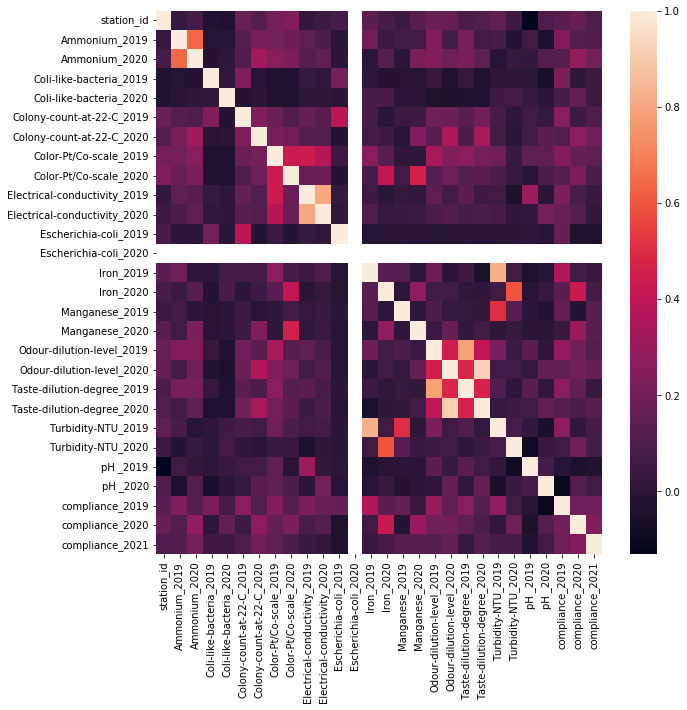

In [108]:
# plotting correlation between diff attributes with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    modified_df.fillna(0).corr()
)

How to impute NA values?:
* The correlation matrix tells us that backfilling with axis = 1 (along columns) would not work 
* Dropping all NaNs will leave us only 32 rows
* Filling with 0 would leave the impression that no particle was detected 
* If the station location would be known, there is the option to interpolate based on location of station to other stations 

Ammonium_2020


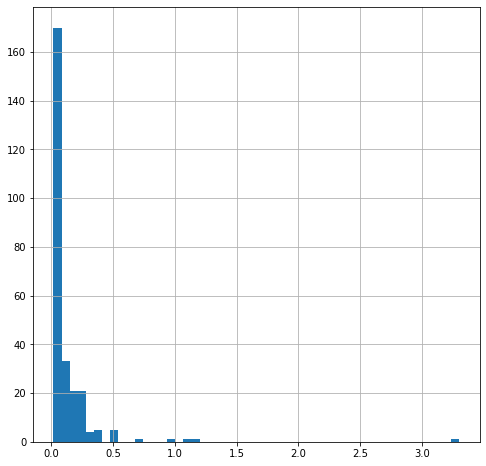

Coli-like-bacteria_2019


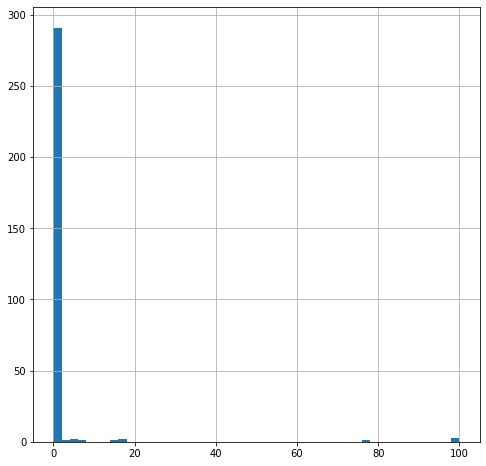

Coli-like-bacteria_2020


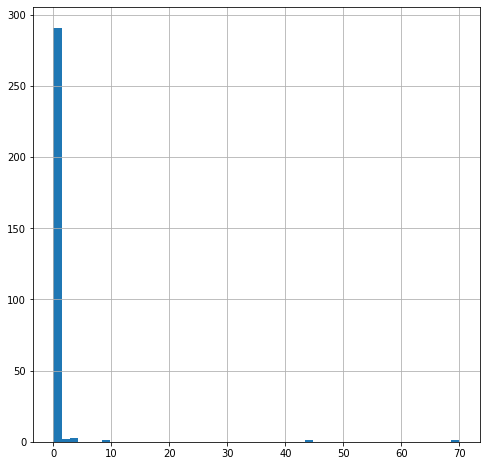

Colony-count-at-22-C_2019


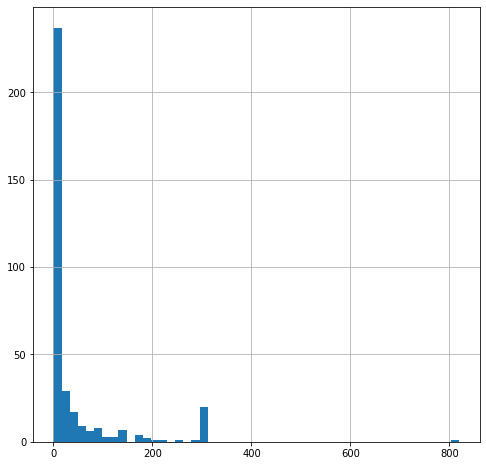

Colony-count-at-22-C_2020


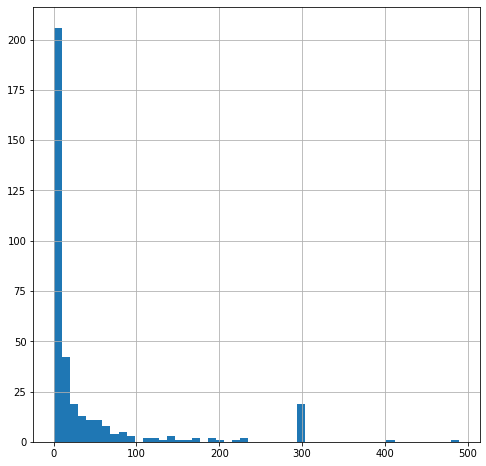

Color-Pt/Co-scale_2019


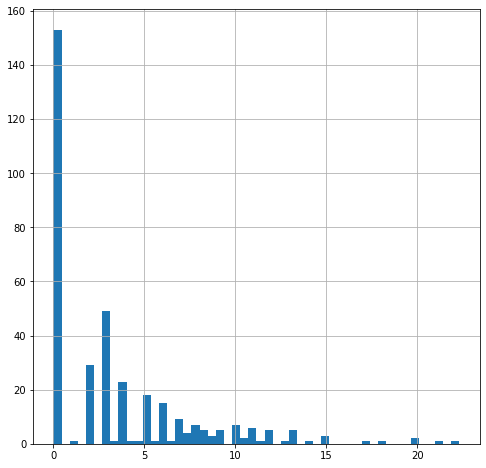

Color-Pt/Co-scale_2020


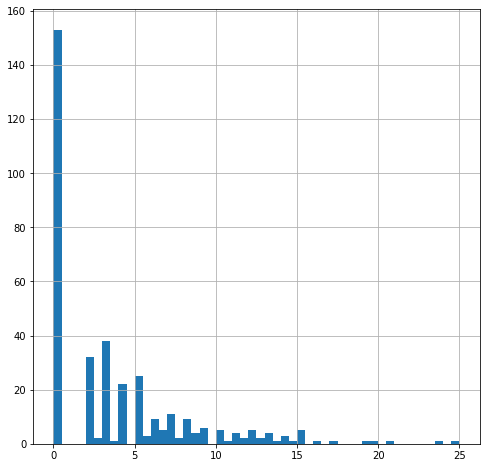

Electrical-conductivity_2019


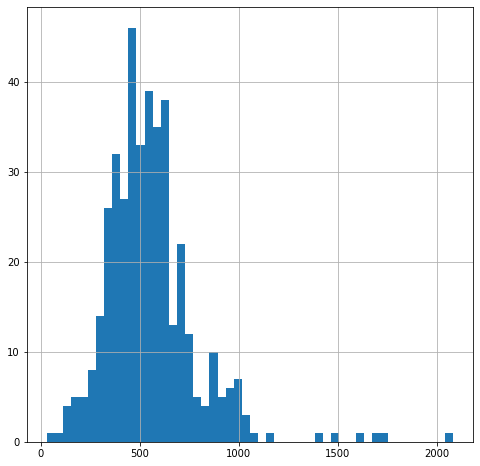

Electrical-conductivity_2020


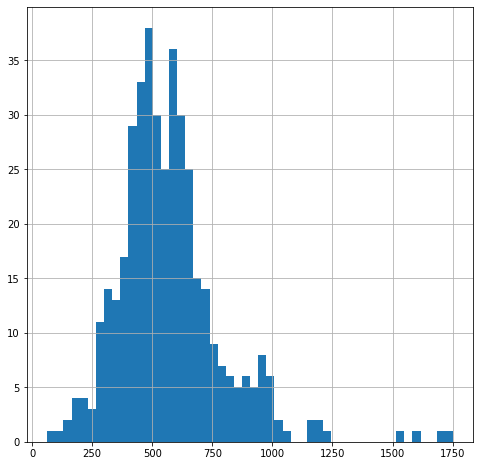

Escherichia-coli_2019


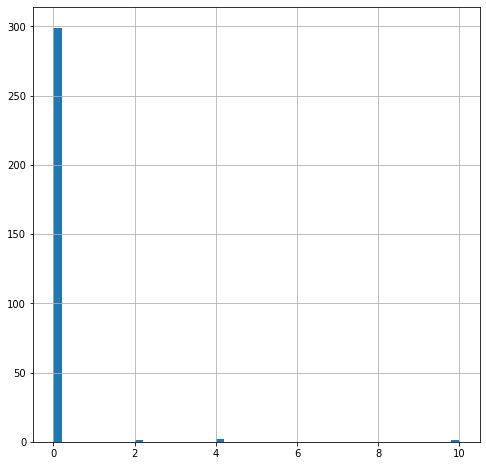

Escherichia-coli_2020


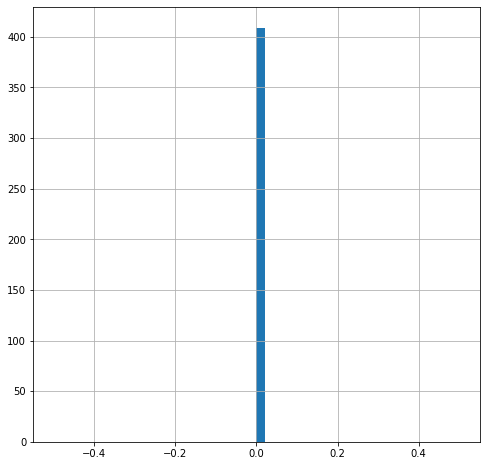

Iron_2019


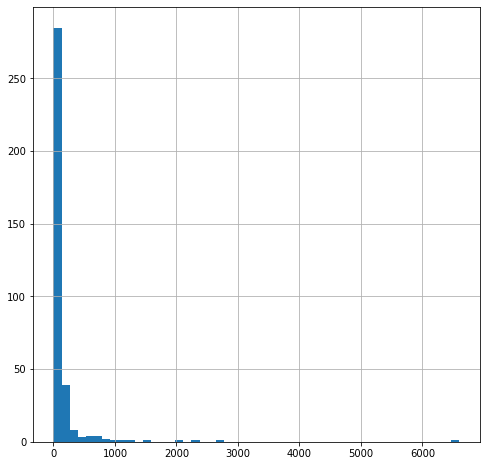

Iron_2020


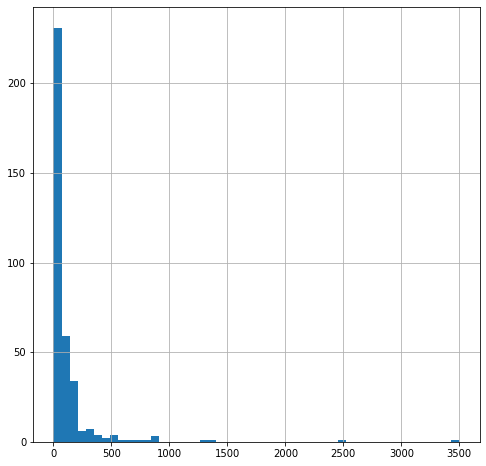

Manganese_2019


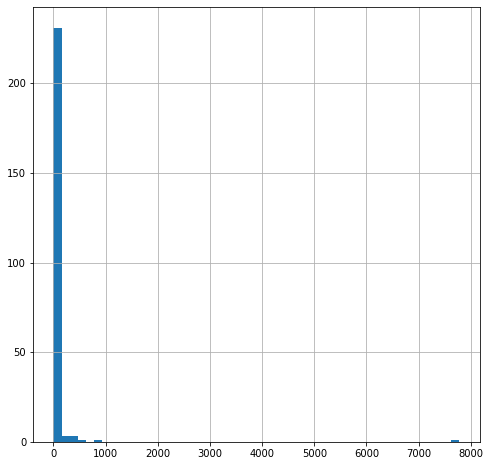

Manganese_2020


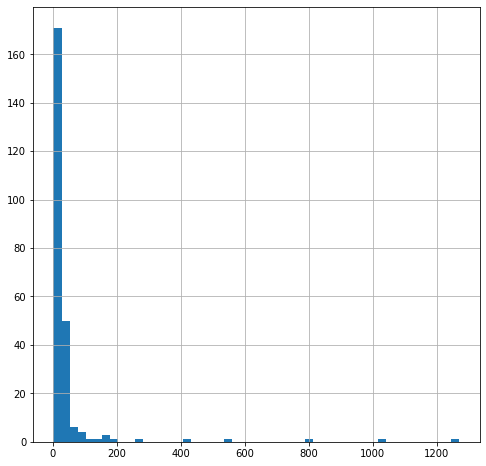

Odour-dilution-level_2019


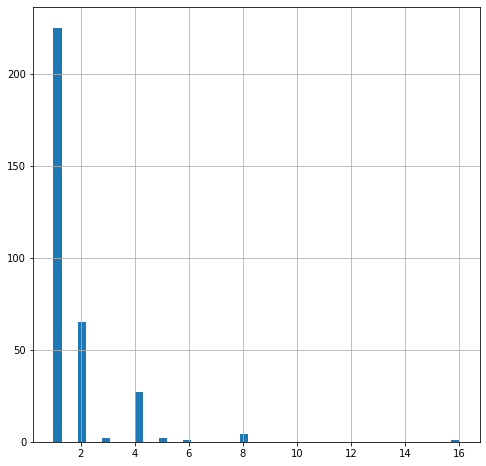

Odour-dilution-level_2020


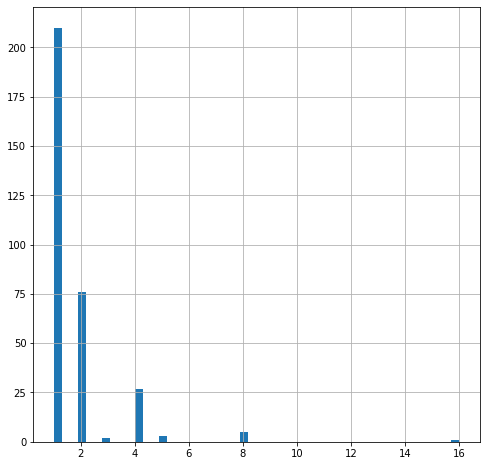

Taste-dilution-degree_2019


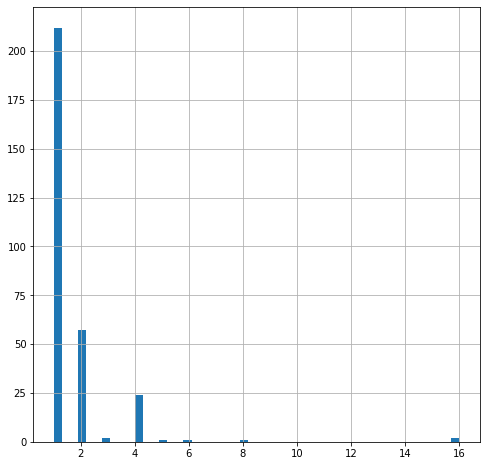

Taste-dilution-degree_2020


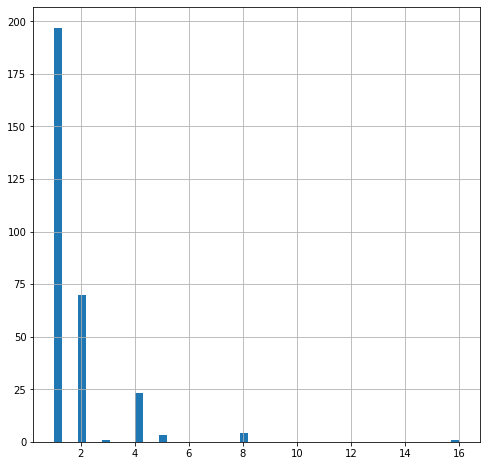

Turbidity-NTU_2019


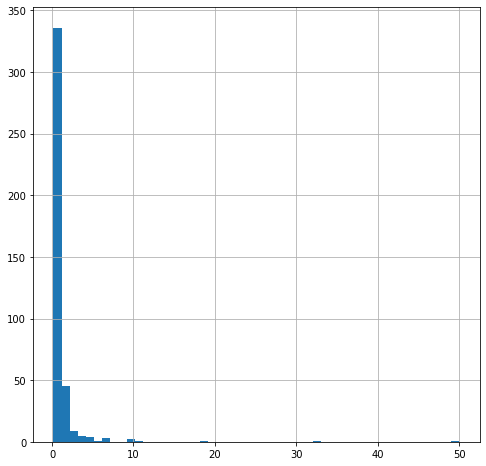

Turbidity-NTU_2020


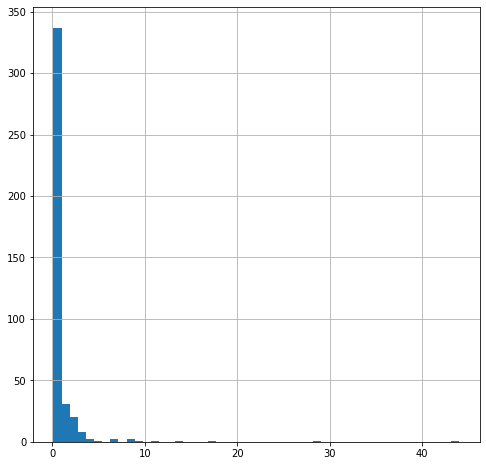

pH _2019


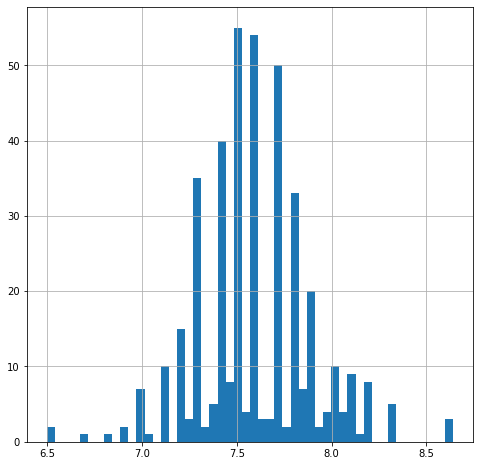

pH _2020


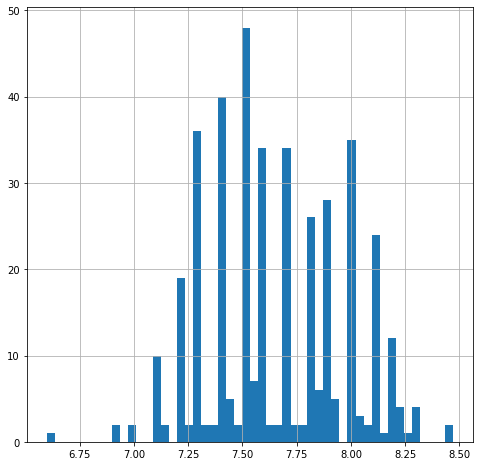

In [165]:
# checking out the distributions of features
for val in mod_2_df.columns[2:-3]:
    plt.figure(figsize=(8,8))
    print(val)
    mod_2_df[f"{val}"].hist(bins = 50)
    plt.show()

Most attributes follow exponential distributions, except for: 
* electrical conductivity which tends to have a negative binomial distribution
* pH has a relatively gaussian distribution 

In [149]:
# will fill the NaNs in E-coli 2020 as 0 - only unique value
modified_df[["Escherichia-coli_2020"]] = modified_df[["Escherichia-coli_2020"]].fillna(value=0)

/tmp/ipykernel_972159/2519566893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_2_df[["Escherichia-coli_2020"]] = mod_2_df[["Escherichia-coli_2020"]].fillna(value=0)


In [247]:
# interpolation of nan values using slinear with 5 points
for val in modified_df.columns[1:-3]:
    modified_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)

/tmp/ipykernel_972159/1707656297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)


In [285]:
# dropping leftover - left with 388 rows out of initial 440 (88%)
modified_df = modified_df.dropna()

In [286]:
modified_df.to_csv("clean_data/train.csv")

Test dataframe should have the same columns and imputation done

In [254]:
# end-goal: based on water level quality, and compliance in 2019, 2020
# predict the compliance in 2021 per measurement station
# not compliant - 1, compliant - 0
test_df = pd.read_csv("data/test.csv")
test_df.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2019,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,163,5.0,5.0,0.08,0.08,0.071,0.062,130.0,102.0,NaN,...,NaN,NaN,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,167,NaN,NaN,0.08,0.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,171,NaN,NaN,NaN,NaN,NaN,NaN,112.0,90.0,NaN,...,NaN,NaN,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,174,5.0,5.0,0.05,0.09,0.072,0.075,248.0,243.0,0.0,...,NaN,NaN,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,178,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [264]:
list(modified_df.columns)[:-1]

['station_id',
 'Ammonium_2019',
 'Ammonium_2020',
 'Coli-like-bacteria_2019',
 'Coli-like-bacteria_2020',
 'Colony-count-at-22-C_2019',
 'Colony-count-at-22-C_2020',
 'Color-Pt/Co-scale_2019',
 'Color-Pt/Co-scale_2020',
 'Electrical-conductivity_2019',
 'Electrical-conductivity_2020',
 'Escherichia-coli_2019',
 'Escherichia-coli_2020',
 'Iron_2019',
 'Iron_2020',
 'Manganese_2019',
 'Manganese_2020',
 'Odour-dilution-level_2019',
 'Odour-dilution-level_2020',
 'Taste-dilution-degree_2019',
 'Taste-dilution-degree_2020',
 'Turbidity-NTU_2019',
 'Turbidity-NTU_2020',
 'pH _2019',
 'pH _2020',
 'compliance_2019',
 'compliance_2020']

In [273]:
test_df = test_df[list(modified_df.columns)[:-1]]

In [268]:
test_df["Escherichia-coli_2019"].unique()

array([ 0., nan])

In [269]:
# will fill the NaNs in E-coli 2020 as 0 - only unique value
test_df[["Escherichia-coli_2020"]] = test_df[["Escherichia-coli_2020"]].fillna(value=0)

In [280]:
# interpolation of nan values using slinear with 5 points
for val in test_df.columns[1:-2]:
    test_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)

/tmp/ipykernel_972159/1938703546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f"{val}"].interpolate(method="slinear", order = 5, limit = 3, inplace = True)


In [290]:
# dropping left over NaN-s - left with 156 out 189 initial rows (82%)
test_df = test_df.dropna()

In [292]:
# saving 
test_df.to_csv("clean_data/test.csv")